# Super position in time with the erfc function

See page 56 of the syllabus

Consider a situaiton in which the surface-water level values in given steps at given times.
Show the groundwater level at given x over a given time period.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp

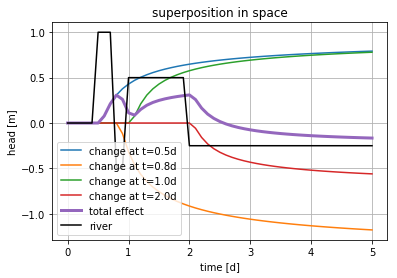

In [8]:
kD = 400 # m2/d
S = 0.1 # [-]

# using arrays instead of lists is convenient in computations
A     = np.array([1.0, -0.5, +0.5, -0.25]) # river stage [m]
dA    = np.hstack((A[0], np.diff(A))) # hstack = glue together
times = np.array([0.5,  0.8,  1.0,  2.0]) # days, stage jump moments
x = 50 # distance to be considered

# The 0.00001 prevents division by zero.
# time values to be plotted
t = np.linspace(0, 5, 51) + 0.00001 # period to be considered (5 days)

# total groundwater change
s = np.zeros_like(t) # set initially to zero

# set up the plot
plt.title('superposition in space')
plt.xlabel('time [d]')
plt.ylabel('head [m]')
plt.grid()

# Loop over all stage changes
for tt, da in zip(times, dA):
    u = np.sqrt(x ** 2 * S / (4 * kD * (t[t>=tt] - tt)))
    ds = np.zeros_like(t) # set all values to zero
    ds[t>=tt] = da * sp.erfc(u) # fill in only values for which t>=tt
    plt.plot(t, ds, label='change at t={:.2}d'.format(tt))
    s = s + ds # add change due to this stage to total
    
plt.plot(t, s, linewidth=3, label='total effect')

# to also plot the river stage itself,
# first generate values for graph of river stage
a = np.zeros_like(t)  # initially zero
for aa, tt in zip(A, times):
    a[t>=tt] = aa

    
plt.plot(t, a, 'k', label='river') # plot the river stage

plt.legend()
plt.show()